In [101]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [102]:
with open('/opt/ml/final/output/vflat_image_1.json') as f:
    json_data = json.load(f)

In [103]:
word_list = json_data['ocr']['word']

In [104]:
text_list = []
x_list = []
y_list = []

for word in word_list:
    sum_x,sum_y = 0.0,0.0
    for idx, point in enumerate(word['points']):
        sum_x += point[0]
        sum_y += point[1]
    avg_x = sum_x/4
    avg_y = sum_y/4
    text_list.append(word['text'])
    x_list.append(avg_x)
    y_list.append(avg_y)

In [105]:
bc_df = pd.DataFrame({'text':text_list,'x':x_list,'y':y_list})
bc_df

,text,x,y
0,계명산업,1501.50,396.00
1,KEM,578.50,382.00
2,|>,784.00,385.00
3,주식회사,2467.50,423.00
4,kemico.,658.25,665.50
...,...,...,...
85,14001,552.00,2018.00
86,|,671.00,2017.25
87,14001,895.00,2018.00
88,IISO,384.00,2020.00


In [106]:
# 두 가지 feature를 대상
data = bc_df[['x', 'y']]

# 정규화 진행
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

<h3> 적절한 k 값을 찾아야 함

In [113]:
k = 3 # 수정해야하는 값

model = KMeans(n_clusters = k)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
bc_df['cluster'] = model.fit_predict(data_scale)

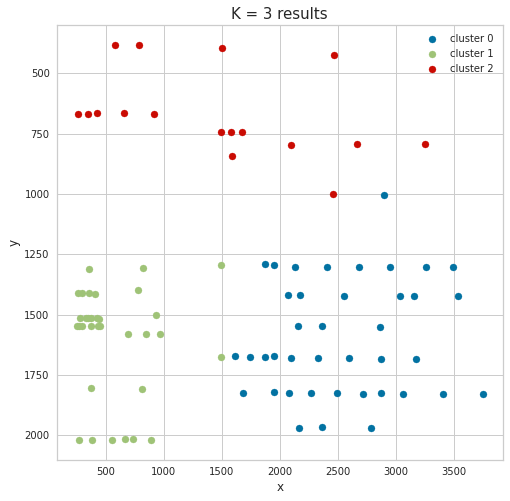

In [108]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(bc_df.loc[bc_df['cluster'] == i, 'x'], bc_df.loc[bc_df['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)
plt.gca().invert_yaxis()
plt.show()

<h3>적절한 k값을 찾아줌(elbow)
    검은 점선

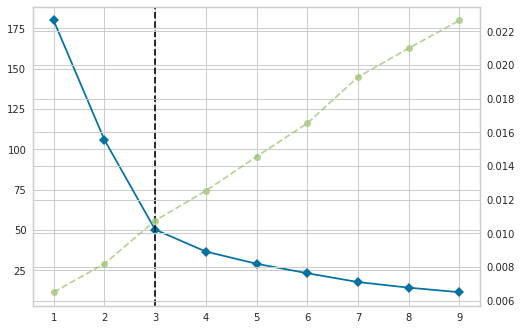

In [109]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
vis = visualizer.fit(data_scale)

In [110]:
bc_df

,text,x,y,cluster
0,계명산업,1501.50,396.00,2
1,KEM,578.50,382.00,2
2,|>,784.00,385.00,2
3,주식회사,2467.50,423.00,2
4,kemico.,658.25,665.50,2
...,...,...,...,...
85,14001,552.00,2018.00,1
86,|,671.00,2017.25,1
87,14001,895.00,2018.00,1
88,IISO,384.00,2020.00,1
